# Prospective tariff determination for a telecom company

The goal of the project is to determine which of a Mobile telecom company's tariffs brings in more money.

The task was set by the commercial department in order to adjust the advertising budget. The company is a federal mobile operator. Clients are offered two tariff plans: "Smart" and "Ultra".

A preliminary analysis of tariffs will be performed on a small sample of customers. The data of 500 users is available: who they are, where they are from, what tariff they use, how many calls they made, MB of Internet spent and messages sent by each of them in 2018. The task of the project is to analyze the behavior of customers, test two hypotheses and draw a conclusion.

The hypotheses are:
the average revenue of users of the "Ultra" and "Smart" tariffs differ;
the average revenue of users from Moscow differs from the revenue of users from other regions.

<h1>Contents<span class="tocSkip"></span></h1>

<a href='#first'> 1. Examine the data<br/>

<a href='#second'> 2. Data preprocessing<br/>

<a href='#third'> 3. Data analysis </a> <br/>
    
<a href='#fourth'> 4. Hypothesis testing </a> <br/>
    
<a href='#fifth'> 5. Final conclusion </a> <br/>

<a id='first'></a>
## 1. Examine the data

In [1]:
import pandas as pd 
import numpy as np 
from scipy import stats as st  

data_calls = pd.read_csv('/datasets/calls.csv') 
data_net = pd.read_csv('/datasets/internet.csv') 
data_msgs = pd.read_csv('/datasets/messages.csv') 
data_tariffs = pd.read_csv('/datasets/tariffs.csv') 
data_users = pd.read_csv('/datasets/users.csv') 

data = [data_calls, data_net, data_msgs, data_tariffs, data_users] 
for i in data: 
    display(i.head()) 
    print(i.info()) 

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [2]:
data_users.sort_values(by = 'city')['city'].unique() #check unique cities 

array(['Архангельск', 'Астрахань', 'Балашиха', 'Барнаул', 'Белгород',
       'Брянск', 'Владивосток', 'Владикавказ', 'Владимир', 'Волгоград',
       'Волжский', 'Вологда', 'Воронеж', 'Грозный', 'Екатеринбург',
       'Иваново', 'Ижевск', 'Иркутск', 'Казань', 'Калининград', 'Калуга',
       'Кемерово', 'Киров', 'Кострома', 'Краснодар', 'Красноярск',
       'Курган', 'Курск', 'Липецк', 'Магнитогорск', 'Махачкала', 'Москва',
       'Мурманск', 'Набережные Челны', 'Нижневартовск', 'Нижний Новгород',
       'Нижний Тагил', 'Новокузнецк', 'Новороссийск', 'Новосибирск',
       'Омск', 'Оренбург', 'Орёл', 'Пенза', 'Пермь', 'Петрозаводск',
       'Подольск', 'Ростов-на-Дону', 'Рязань', 'Самара',
       'Санкт-Петербург', 'Саранск', 'Саратов', 'Севастополь', 'Смоленск',
       'Сочи', 'Ставрополь', 'Стерлитамак', 'Сургут', 'Тамбов', 'Тверь',
       'Тольятти', 'Томск', 'Тула', 'Тюмень', 'Улан-Удэ', 'Ульяновск',
       'Уфа', 'Хабаровск', 'Химки', 'Чебоксары', 'Челябинск', 'Череповец',
       'Чи

### Conclusion

Data tables were opened and examined.
Among the data types that need to be replaced:
1) The date in all tables (call, message, etc.) is in the Object format - it is recommended to convert it to the Datetime format. <br/>
2) The duration of the minutes of the conversation has the Float data type - the operator takes into account whole minutes with rounding up - so there is a need to cast the data to the Int type with rounding up. <br/>
3) The duration of the Internet session has the Float data type - the operator takes into account whole gigabytes with rounding up - therefore, it is necessary to convert the data to the Int type with rounding up. This step will be done after grouping the data by months (because the operator rounds the data for the month, and not for a separate Internet session). <br/>

Regarding data errors: as mentioned above, the operator considers the use of the Internet in GB. At the same time, the data_tariffs table shows data in GB. It is proposed to translate them into GB (15 - smart tariff and 30 - ultra tariff). There is an unnamed column in the data_net table - it is not yet clear how it will be used, and therefore it is proposed not to delete it.

The city names were checked for the duplicates (for the further test of the hypothesis) - city names are unique and do not repeat.

<a id='second'></a>
## 2. Data preprocessing

In [3]:
#Type changes
data_calls['call_date']= pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d') 
data_net['session_date']= pd.to_datetime(data_net['session_date'], format='%Y-%m-%d') 
data_msgs['message_date']= pd.to_datetime(data_msgs['message_date'], format='%Y-%m-%d') 
data_users['reg_date']= pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d') 
data_users['churn_date']= pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d') 

In [4]:
#Rounding up and type changes duration of calls
data_calls['duration'] = data_calls['duration'].apply(np.ceil) 
data_calls['duration'] = data_calls['duration'].astype('int') 
data_calls.head() #check

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000


In [5]:
#Columns for the further analysis
data_calls['call_month'] = pd.DatetimeIndex(data_calls['call_date']).month 
data_net['session_month'] = pd.DatetimeIndex(data_net['session_date']).month 
data_msgs['message_month'] = pd.DatetimeIndex(data_msgs['message_date']).month 
data_tariffs['gb_included'] = [15,30] 

In [6]:
# Aggregation for the further analysis
# 2.1_Number and duration of user calls by months
pivot_calls = data_calls.pivot_table(index=('user_id','call_month'), values='duration', aggfunc=('count', 'sum')) 
pivot_calls = pivot_calls.rename(columns = {'count' : 'calls_total', 'sum' : 'calls_duration'}) 
display(pivot_calls.head()) 
pivot_calls.info() 

# 2.2_Number of SMS of users by month
pivot_msgs = data_msgs.pivot_table(index=('user_id','message_month'), values='id', aggfunc='count') 
pivot_msgs = pivot_msgs.rename(columns = {'id' : 'msgs_total'}) 
display(pivot_msgs.head())
pivot_msgs.info()

# 2.3_The volume of Internet traffic of users by months
pivot_net = data_net.pivot_table(index=('user_id', 'session_month'), values='mb_used', aggfunc='sum') 
display(pivot_net.head()) 
pivot_net = pivot_net/1000 #divide the traffic by 1000 (MB to GB)
pivot_net = pivot_net.apply(np.ceil) #round down GB
pivot_net = pivot_net.rename(columns = {'mb_used' : 'gb_used'}) 
display(pivot_net.head()) 
pivot_net.info()

calls_total  calls_duration
user_id call_month                             
1000    5                    22             159
        6                    43             172
        7                    47             340
        8                    52             408
        9                    58             466

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   calls_total     3174 non-null   int64
 1   calls_duration  3174 non-null   int64
dtypes: int64(2)
memory usage: 62.9 KB


msgs_total
user_id message_month            
1000    5                      22
        6                      60
        7                      75
        8                      81
        9                      57

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2717 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   msgs_total  2717 non-null   int64
dtypes: int64(1)
memory usage: 32.7 KB


mb_used
user_id session_month          
1000    5               2253.49
        6              23233.77
        7              14003.64
        8              14055.93
        9              14568.91

gb_used
user_id session_month         
1000    5                  3.0
        6                 24.0
        7                 15.0
        8                 15.0
        9                 15.0

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3203 entries, (1000, 5) to (1499, 12)
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gb_used  3203 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


In [7]:
#Tables merge
data = pivot_net.join(pivot_msgs, how='outer', on=('user_id','session_month')) #merge tables, include data that is in at least one table
data = data.join(pivot_calls, how='outer', on=('user_id','session_month')) #merge tables, include data that is in at least one table

data.info() 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1446, 8)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gb_used         3203 non-null   float64
 1   msgs_total      2717 non-null   float64
 2   calls_total     3174 non-null   float64
 3   calls_duration  3174 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


Since there are gaps after joining the tables, it is proposed to replace them with 0 (because a gap means that the Client did not use the Internet / messages / calls in a given month).

In [8]:
data = data.fillna(0) 
data.info()  

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1446, 8)
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gb_used         3214 non-null   float64
 1   msgs_total      3214 non-null   float64
 2   calls_total     3214 non-null   float64
 3   calls_duration  3214 non-null   float64
dtypes: float64(4)
memory usage: 130.4 KB


In [9]:
data.reset_index(drop=False, inplace=True) #reset index, but leave previous index
data.head()

,user_id,session_month,gb_used,msgs_total,calls_total,calls_duration
0,1000,5,3.0,22.0,22.0,159.0
1,1000,6,24.0,60.0,43.0,172.0
2,1000,7,15.0,75.0,47.0,340.0
3,1000,8,15.0,81.0,52.0,408.0
4,1000,9,15.0,57.0,58.0,466.0


In [10]:
#Tables merge_2 - adding a tariff and its indicators
merger = data_users.loc[:,['tariff','user_id', 'city']] 
data = data.merge(merger, on='user_id', how='left') #merge tables, include rows from data
data_tariffs = data_tariffs.rename(columns = {'tariff_name' : 'tariff'}) 
data = data.merge(data_tariffs, on='tariff', how='inner') #merge tables, include rows from data

data

,user_id,session_month,gb_used,msgs_total,calls_total,calls_duration,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included
0,1000,5,3.0,22.0,22.0,159.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
1,1000,6,24.0,60.0,43.0,172.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
2,1000,7,15.0,75.0,47.0,340.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
3,1000,8,15.0,81.0,52.0,408.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
4,1000,9,15.0,57.0,58.0,466.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1499,9,2.0,11.0,9.0,70.0,smart,Пермь,50,15360,500,550,200,3,3,15
3210,1499,10,18.0,48.0,68.0,449.0,smart,Пермь,50,15360,500,550,200,3,3,15
3211,1499,11,18.0,59.0,74.0,612.0,smart,Пермь,50,15360,500,550,200,3,3,15
3212,1499,12,14.0,66.0,69.0,492.0,smart,Пермь,50,15360,500,550,200,3,3,15


In [11]:
#Adding auxiliary columns
data['gb_overlimit'] = data['gb_used'] - data['gb_included'] #GB above limit
data['msgs_overlimit'] = data['msgs_total'] - data['messages_included'] #sms overlimit
data['minutes_overlimit'] = data['calls_duration'] - data['minutes_included'] #minutes overlimit

def remove_negatives(value): #delete negatives
    if value <0: 
        return 0 
    else: 
        return value 
data['gb_overlimit'] = data['gb_overlimit'].apply(remove_negatives) 
data['msgs_overlimit'] = data['msgs_overlimit'].apply(remove_negatives) 
data['minutes_overlimit'] = data['minutes_overlimit'].apply(remove_negatives) 
data.head()

,user_id,session_month,gb_used,msgs_total,calls_total,calls_duration,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,gb_overlimit,msgs_overlimit,minutes_overlimit
0,1000,5,3.0,22.0,22.0,159.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0
1,1000,6,24.0,60.0,43.0,172.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0
2,1000,7,15.0,75.0,47.0,340.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0
3,1000,8,15.0,81.0,52.0,408.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0
4,1000,9,15.0,57.0,58.0,466.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0


In [12]:
#2.4 Monthly revenue per customer
data['revenue'] = data['rub_monthly_fee'] + data['gb_overlimit']*data['rub_per_gb'] + data['msgs_overlimit']*data['rub_per_message'] + data['minutes_overlimit']*data['rub_per_minute'] #calculate revenue
data.tail()

,user_id,session_month,gb_used,msgs_total,calls_total,calls_duration,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,gb_overlimit,msgs_overlimit,minutes_overlimit,revenue
3209,1499,9,2.0,11.0,9.0,70.0,smart,Пермь,50,15360,500,550,200,3,3,15,0.0,0.0,0.0,550.0
3210,1499,10,18.0,48.0,68.0,449.0,smart,Пермь,50,15360,500,550,200,3,3,15,3.0,0.0,0.0,1150.0
3211,1499,11,18.0,59.0,74.0,612.0,smart,Пермь,50,15360,500,550,200,3,3,15,3.0,9.0,112.0,1513.0
3212,1499,12,14.0,66.0,69.0,492.0,smart,Пермь,50,15360,500,550,200,3,3,15,0.0,16.0,0.0,598.0
3213,1446,8,0.0,1.0,4.0,50.0,smart,Липецк,50,15360,500,550,200,3,3,15,0.0,0.0,0.0,550.0


### Conclusion

The data types have been changed.
Auxiliary columns have also been added.

For each customer, the following indicators were calculated and combined into one table, broken down by months:
1) Number of calls made and minutes spent on conversation; <br/>
2) The number of messages sent; <br/>
3) The amount of Internet traffic used; <br/>
4) Monthly revenue.<br/>

The data above will be used for the further research.

<a id='third'></a>
## 3. Data analysis

smart
Mean calls_duration 417.9349484073576
Variance: calls_duration 36203.06665209469
Standard deviation: calls_duration 190.27103471651876

Mean msgs_total 33.384028712427096
Variance: msgs_total 796.455482917076
Standard deviation: msgs_total 28.221542886898938

Mean gb_used 16.695827725437415
Variance: gb_used 34.528385463367684
Standard deviation: gb_used 5.876085896527354

ultra
Mean calls_duration 526.6233502538071
Variance: calls_duration 100771.2236172022
Standard deviation: calls_duration 317.44483554974113

Mean msgs_total 49.36345177664975
Variance: msgs_total 2282.9460753948824
Standard deviation: msgs_total 47.78018496610161

Mean gb_used 19.965482233502538
Variance: gb_used 101.92571207709551
Standard deviation: gb_used 10.095826468253875



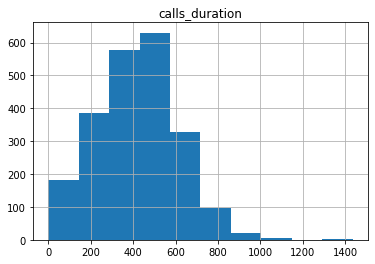

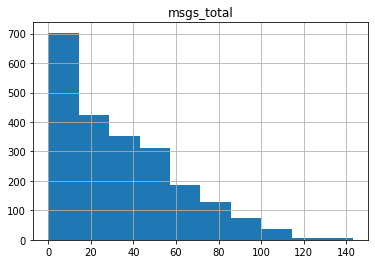

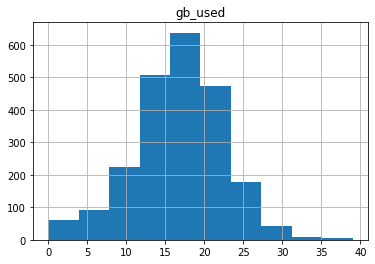

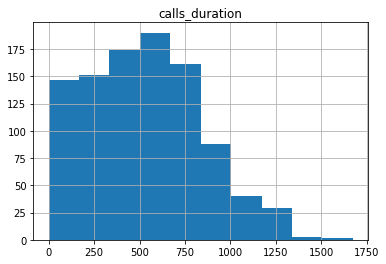

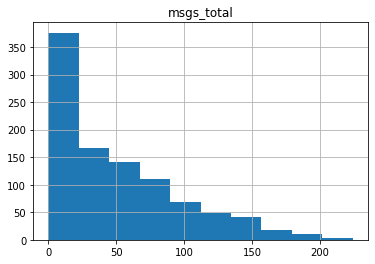

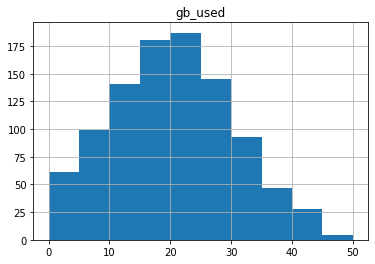

In [13]:
smart = data[data['tariff'] == 'smart'] 
ultra = data[data['tariff'] == 'ultra'] 

columns_cycle = ['calls_duration', 'msgs_total', 'gb_used'] 
dfs_cycle = [smart, ultra] 
for df in dfs_cycle: #for each df
    print([x for x in globals() if globals()[x] is df][0]) #print df name
    for column in columns_cycle: #for each column from columns_cycle
        print('Mean', column, df[column].mean()) #get Mean
        print('Variance:', column, np.var(df[column])) #get Variance
        print('Standard deviation:', column, np.sqrt(np.var(df[column]))) #get Standard deviation
        print()
        df.hist(column) #get histograms
        
    

<AxesSubplot:ylabel='Frequency'>

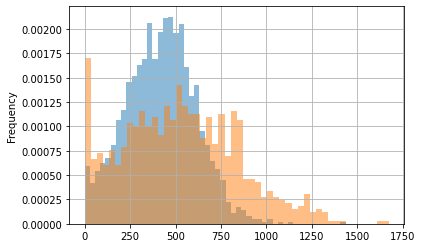

In [14]:
smart['calls_duration'].plot(kind='hist', bins=50, grid=True, density=True, alpha = 0.5)
ultra['calls_duration'].plot(kind='hist', bins=50, grid=True, density=True, alpha = 0.5)

### Conclusion

After analyzing the graphs and indicators, the following conclusions can be drawn.

Users using the Smart tariff make shorter calls  on average - 108 minutes, send 16 SMS less, and use 3 GB of Internet less. This can be explained by the fact that this tariff is chosen by users who, in general, plan to use mobile communications less, since fewer bonuses are included into the tariff. It is important to note that, on average, users exceed the limit of the Internet included in the tariff.

At the same time, users of the Smart tariff differ less from each other in habits than users of the Ultra tariff - this can be estimated from the variance and standard deviation, which are higher for Ultra tariff users in all three cases. This again can be explained by the fact that users of the Smart tariff have fewer bonuses, thus, they are "squeezed" into a tighter framework when using tariffs.

At the same time, according to the distribution graphs, it can be seen that in all cases the distribution is negatively skewed, while this skewness is more pronounced for the Ultra tariff. This suggests that more users use fewer minutes and GB of internet. Message generally correlate with each other - which indicates similar habits of users of both tariffs.

<a id='fourth'></a>
## 4. Hypothesis testing

Two hypotheses need to be tested:

1) the average revenue of users of the "Ultra" and "Smart" tariffs differ; <br/>
2) the average revenue of users from Moscow differs from the revenue of users from other regions

The following formulations of the null and alternative hypotheses are proposed for the verification: <br/>
1)<br/>
H0: "The average revenue of Ultra users is **equals** to the average revenue of Smart users" <br/>
H1: "Average revenue of users of Ultra tariffs **does not equal** to average revenue of users of Smart tariffs" <br/>

2)<br />
H0: "The average revenue of users from Moscow **equals** the average revenue of users from other cities" <br/>
H1: "The average revenue of users from Moscow **does not equal** to the average revenue of users from other cities"

The alternative hypothesis was formulated this way, since the conditions did not say anything about the direction of the revenue (more or less), therefore the hypothesis can remain two-sided.

The alpha threshold will be set to 5%.
The equal_var parameter is planned to be set to False, since the samples are of different sizes and it can be assumed that the variances of the populations of tariffs / cities are different.

In [15]:
alpha = .05 

hypothesis_1 = st.ttest_ind(smart['revenue'], ultra['revenue'], equal_var=False) #ttest revenue tariffs 
print('p-value:', hypothesis_1.pvalue) 

if hypothesis_1.pvalue < alpha: 
    print('Rejecting the null hypothesis') 
else: 
    print('It is not possible to reject the null hypothesis') 

p-value: 9.070850352445897e-208
Rejecting the null hypothesis


In [16]:
print('Mean revenue smart', smart['revenue'].mean()) 
print('Mean revenue ultra', ultra['revenue'].mean()) 
print('Standard deviation smart:', np.std(smart['revenue'])) 
print('Standard deviation ultra:', np.std(ultra['revenue'])) 

Mean revenue smart 1345.962763571108
Mean revenue ultra 2089.340101522843
Standard deviation smart: 854.8137537328399
Standard deviation ultra: 413.3287810995853


In [17]:
moscow = data[data['city'] == 'Москва'] 
other_cities = data[data['city'] != 'Москва'] 
display(moscow.head(), moscow.shape[0]) #check
display(other_cities.head(), other_cities.shape[0]) #check

hypothesis_2 = st.ttest_ind(moscow['revenue'], other_cities['revenue'], equal_var=False) #ttest revenue cities
print('p-value:', hypothesis_2.pvalue) 

if hypothesis_2.pvalue < alpha: 
    print('Rejecting the null hypothesis')  
else: 
    print('It is not possible to reject the null hypothesis') 

,user_id,session_month,gb_used,msgs_total,calls_total,calls_duration,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,gb_overlimit,msgs_overlimit,minutes_overlimit,revenue
8,1003,8,9.0,37.0,55.0,380.0,ultra,Москва,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
9,1003,9,13.0,91.0,134.0,961.0,ultra,Москва,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
10,1003,10,15.0,83.0,108.0,855.0,ultra,Москва,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
11,1003,11,12.0,94.0,115.0,824.0,ultra,Москва,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
12,1003,12,11.0,75.0,108.0,802.0,ultra,Москва,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0


611

,user_id,session_month,gb_used,msgs_total,calls_total,calls_duration,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_included,gb_overlimit,msgs_overlimit,minutes_overlimit,revenue
0,1000,5,3.0,22.0,22.0,159.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
1,1000,6,24.0,60.0,43.0,172.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
2,1000,7,15.0,75.0,47.0,340.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
3,1000,8,15.0,81.0,52.0,408.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0
4,1000,9,15.0,57.0,58.0,466.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1,30,0.0,0.0,0.0,1950.0


2603

p-value: 0.5846845024565437
It is not possible to reject the null hypothesis


In [18]:
print('Mean revenue Moscow', moscow['revenue'].mean()) 
print('Mean revenue Other cities', other_cities['revenue'].mean()) 
print('Standard deviation Moscow:', np.std(moscow['revenue'])) 
print('Standard deviation Other cities:', np.std(other_cities['revenue'])) 

Mean revenue Moscow 1589.430441898527
Mean revenue Other cities 1570.1148674606225
Standard deviation Moscow: 773.6007227389507
Standard deviation Other cities: 833.5738084555883


### Conclusion

1) Average revenue of Ultra and Smart tariff users **differs**; <br/>
2) The average revenue of users from Moscow **does not differ** from the revenue of users from other regions

The resulting p-value indicates the probability of getting such or higher difference by chance. In the first case, the value is very small - below the critical level - hence the choice is made in favor of an alternative hypothesis. In the second case, the probability is too high (58%) to conclude that there is a significant difference between average revenues.

<a id='fifth'></a>
## 5. Final conclusion

Based on the preliminary analysis, we can conclude that Ultra tariff users use cellular services more "actively", making more calls, consuming more Internet traffic and sending out more SMS. At the same time, these users differ more from each other in habits than users of the Smart tariff.

Users of the Ultra tariff bring on average higher revenue than Smart tariff users. At the same time, the average revenue of tariff users differs, while the user's city of residence does not have a big impact.

Based on the preliminary analysis, we can conclude that the Ultra tariff brings more money to the company.